In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Read the dataset using pandas
d1 = pd.read_csv('../Train_details_22122017.csv')

G = nx.Graph()

#defining the function to get maximum disonnected graphs from a network
def get_max_disconnected_points(G,flag):
    ap_list = list(nx.articulation_points(G))
    max_stations = 0
    ap_dict = dict()
    for a in ap_list:
        G2 = G1.copy()
        G2.remove_node(a)
        ha = list(nx.connected_components(G2))
        n = len(ha[1])
        if n == 222 and flag == 0:
            return n
        if n>max_stations:
            max_stations = n;
        ap_dict[a] = ha[1]
        
    if flag == 0:
        return max_stations
    else:
        ap_dict = dict(sorted(ap_dict.items(), key=lambda item: item[1]))
        return ap_dict
#Function to find the degree distribution from a list of degrees
#Returns a dictionary having the keys as degree and value as its number of occurences
def get_ddist(g):
    l = len(g)
    d = dict()
    for i in range(0,l):
        if g[i] in d.keys():
            d[g[i]] = d[g[i]] + 1
        else:
            d[g[i]] = 1
    return d
#Getting max seq number for all trains
train_no_max_seq = dict()
print("Finding max seq number for all trains")
for i in range(len(d1['Train No'])):
    if d1['Train No'][i] in train_no_max_seq:
        if train_no_max_seq[d1['Train No'][i]] < d1['SEQ'][i]:
            train_no_max_seq[d1['Train No'][i]] = d1['SEQ'][i]
    else:
        train_no_max_seq[d1['Train No'][i]] = 0
#Create the graph from dataset
for i in range(0,len(d1['Train No'])):
    if i < len(d1['Train No']) - 1:
        if d1['SEQ'][i+1] != 1:
            distance = d1['Distance'][i+1] - d1['Distance'][i]
            seq_no = train_no_max_seq[d1['Train No'][i]] - d1['SEQ'][i] 
            G.add_edge(d1['Station Code'][i],d1['Station Code'][i+1],weight=distance)
            G.nodes[d1['Station Code'][i]][d1['Train No'][i]] = seq_no
            
print("Graph formed successfully")
    
#getting a list of all the connected components in G
h = list(nx.connected_components(G))

#Selecting the largest connected component
G1 = nx.subgraph(G,h[0])
print("Largest connected graph formed successfully")

# #Getting the degree distribution of G1
# dict1 = dict(G1.degree())
# dd = get_ddist(list(dict1.values()))
# print("Got degree distribution")

# #Sorting dd according to degree
# dds = dict(sorted(dd.items()))

# # #FInding the APL of G1
# # #apl = nx.average_shortest_path_length(G1)

# #Finding the average clustering co-efficient
# acc = nx.clustering(G1)
# print("Found acc")

# #To plot the degree distribution
# # plt.plot(dds.keys(),dds.values())
# # plt.title('Degree distribution')
# # plt.xlabel('Degree')
# # plt.ylabel('No of nodes')

# #To plot the variation of clustering co-efficient
# acc_dict = dict(acc)
# acc_dds = get_ddist(list(acc_dict.values()))
# dds = dict(sorted(acc_dds.items()))
# plt.plot(dds.keys(),dds.values())
# plt.title('Clustering Coefficient')
# plt.xlabel('Clustering Coefficient')
# plt.ylabel('No of nodes')
# print("Maximum cc = " + str(max(acc_dict.values())))
# print("Minimum cc = " + str(min(acc_dict.values())))

# #To find the number of bridge links
# bridge_links = list(nx.bridges(G1))

# #To find the number of articulation points
# ap = list(nx.articulation_points(G1))

# ap_dict = get_max_disconnected_points(G1,1)

# #non linear weights for stations
# node_weights = dict()
# node_list = list(G1.nodes())
# print("Initialising node weights")
# for n in node_list:
#     node_weights[n] = 0
# count = 1
# for a in list(ap_dict.keys()):
#     G2 = G1.copy()
#     G2.remove_node(a)
#     weight = len(test_list[a])**2
#     print("Weight = " + str(weight))
#     print("In " + str(count) + " out of " + str(len(ap_dict.keys())))
#     count = count+1
#     for n in ap_dict[a]:
#         node_weights[n] = node_weights[n] + weight
# node_weights = dict(sorted(node_weights.items(), key=lambda item: item[1]))
# print(node_weights)

#to find percentage of trains stopped due to an ap
print("Finding sum of seq for affected trains")
ap_list = list(nx.articulation_points(G1))
ap_percentage_dict = dict()
for ap in ap_list:
    max_sum = 0
    node_sum = sum(G1.nodes[ap].values())
    ap_percentage_dict[ap] = node_sum
    
ap_percentage_dict = dict(sorted(ap_percentage_dict.items(), key=lambda item: item[1]))
print(ap_percentage_dict)

# #to find percentage of trains stopped due to an ap
# ap_list = list(nx.articulation_points(G1))
# ap_percentage_dict = dict()
# for ap in ap_list:
#     max_sum = 0
#     node_sum = sum(G1.nodes[ap].values())
#     for train in list(G1.nodes[ap].keys()):
#         max_sum = max_sum + train_no_max_seq[train]
#     ap_percentage_dict[ap] = node_sum/max_sum
    
# ap_percentage_dict = dict(sorted(ap_percentage_dict.items(), key=lambda item: item[1]))
# print(ap_percentage_dict)
# #To find the most important articulation point
# count = 0
# c7 = 0
# nap = np.empty((len(ap),3),dtype='S5')
# for a in ap:
#     G2 = nx.Graph(G1)
#     G2.remove_node(a)
#     h1 = list(nx.connected_components(G2))
#     G21 = nx.subgraph(G2,h1[0])
#     G22 = nx.subgraph(G2,h1[1])
#     n1 = len(list(G21.nodes))
#     n2 = len(list(G22.nodes))
#     nap[count,0] = a
#     nap[count,1] = str(n1)
#     nap[count,2] = str(n2)
#     count = count + 1
    
#     if abs(n1 - n2) < 7000:
#         print("Articulation point: " + str(a))
#         print("The graph is split into " + str(n1) + " " + str(n2)) 
#         c7 = c7 + 1
#     if abs(n1 - n2) < 7500 and count > 100 and c7 < 10:
#         print("Articulation point: " + str(a))
#         print("The graph is split into " + str(n1) + " " + str(n2))
#     if abs(n1 - n2) < 8000 and count > 200 and c7 < 10:
#         print("Articulation point: " + str(a))
#         print("The graph is split into " + str(n1) + " " + str(n2))
# lnap = nap[:,2]
# knap = np.empty(len(lnap))
# ic = 0
# for i in lnap:
#     knap[ic] = int(i)
#     ic = ic + 1
# apdict = dict()
# ni = 0
# for ni in range(len(nap)):
#     k = int(nap[ni,2])
#     if k in apdict.keys():
#         apdict[k] = apdict[k] + 1
#     else:
#         apdict[k] = 1
# dap = dict(sorted(apdict.items()))
# plt.plot(dap.keys(),dap.values())
# plt.title('Articulation points')
# plt.xlabel('No of nodes in smaller graph')
# plt.ylabel('No of Articulation points')

# #Getting sorted order of important articulation points
# ap_sm = dict()
# for i in range(len(nap)):
#     ap_sm[int(nap[i,2])] = (nap[i,0].decode('utf-8'))

# ap_sms = dict(sorted(ap_sm.items()))

Finding max seq number for all trains
Graph formed successfully
Largest connected graph formed successfully
Finding sum of seq for affected trains
{'GGNP': 2, 'BBCE': 3, 'TNO': 3, 'BDQ': 3, 'BPKH': 4, 'MKWI': 4, 'PKJN': 5, 'VGRA': 5, 'SAMN': 5, 'THMA': 5, 'GTWD': 6, 'SDHR': 6, 'NRY': 6, 'MRKL': 6, 'TLL': 7, 'RPY': 7, 'DUT': 7, 'HNR': 7, 'BPJ': 7, 'GAMN': 7, 'CHOD': 7, 'BHRM': 8, 'BLGH': 8, 'SKKE': 8, 'CHHU': 8, 'KIJ': 8, 'RRP': 8, 'BDO': 8, 'HLD': 8, 'KHA': 8, 'JRBM': 9, 'JIGT': 9, 'KMNG': 9, 'SIBR': 9, 'RNGN': 9, 'MRBD': 9, 'NSCL': 9, 'NXR': 9, 'SAHA': 9, 'BCW': 11, 'SILR': 11, 'PCY': 11, 'GVMH': 11, 'KDUH': 11, 'DKSA': 11, 'RBCS': 11, 'NSPH': 11, 'VGH': 11, 'VH': 11, 'KRAP': 11, 'AKAH': 11, 'KOVH': 11, 'MHN': 11, 'GBE': 11, 'TDH': 11, 'RTG': 11, 'SN': 11, 'BUF': 11, 'PSJ': 11, 'CPE': 11, 'CJQ': 11, 'LTK': 11, 'DMF': 11, 'KRMD': 11, 'BORD': 12, 'BORT': 12, 'RSKA': 12, 'BYZA': 12, 'KURT': 12, 'RTRA': 13, 'JMRA': 13, 'MOAR': 13, 'KLCR': 13, 'MPRA': 13, 'LLBR': 13, 'MNCR': 13, 'HKD': 13,

In [6]:
G2 = G1.copy()
G2.remove_node('TNA')
h1 = list(nx.connected_components(G2))
print((h1[1]))

{'NEU'}


In [15]:
print(len(G1.nodes['TNA'].keys()))

602


In [ ]:
print(len())

In [14]:
print("Finding sum of seq for affected trains for all nodes")
ap_list = list(nx.articulation_points(G1))
ap_percentage_dict = dict()
for ap in list(G1.nodes().keys()):
    max_sum = 0
    node_sum = sum(G1.nodes[ap].values())
    ap_percentage_dict[ap] = node_sum
    
ap_percentage_dict = dict(sorted(ap_percentage_dict.items(), key=lambda item: item[1]))
print(ap_percentage_dict)

Finding sum of seq for affected trains for all nodes
{'VNGP': 0, 'KDS': 1, 'PTPL': 1, 'KURV': 1, 'RMBG': 1, 'VNGL': 1, 'NEYT': 1, 'WSC': 1, 'CMBR': 1, 'PBC': 2, 'BIDD': 2, 'BRMA': 2, 'KRCA': 2, 'GGNP': 2, 'PDMI': 2, 'MNKD': 2, 'SZE': 3, 'TNO': 3, 'BDQ': 3, 'CNV': 3, 'SKIP': 3, 'BRTA': 3, 'SQB': 3, 'BBCE': 3, 'LLKN': 4, 'LIM': 4, 'PWU': 4, 'HRNS': 4, 'MDVB': 4, 'VTL': 4, 'MKWI': 4, 'BPKH': 4, 'PUHT': 4, 'NRSD': 4, 'MEH': 5, 'DDS': 5, 'KNH': 5, 'PRGR': 5, 'PJLE': 5, 'BRPS': 5, 'NNHT': 5, 'KUMT': 5, 'MGZ': 5, 'PCTM': 5, 'THMA': 5, 'SAMN': 5, 'VGRA': 5, 'PKJN': 5, 'DGFJ': 5, 'QDN': 5, 'CRZ': 6, 'KODR': 6, 'GTWD': 6, 'SDHR': 6, 'ALPD': 6, 'NRY': 6, 'MJZ': 6, 'RJU': 6, 'CIA': 6, 'KSA': 6, 'MRKL': 6, 'JKAR': 6, 'KKR': 6, 'BRL': 6, 'PPS': 6, 'DAC': 6, 'WWA': 6, 'GRMT': 7, 'JSA': 7, 'BBC': 7, 'RMX': 7, 'GGY': 7, 'GDD': 7, 'JSD': 7, 'CHOD': 7, 'GAMN': 7, 'BHNG': 7, 'BPJ': 7, 'HNR': 7, 'DUT': 7, 'RPY': 7, 'TLL': 7, 'DNGI': 7, 'ARMU': 7, 'MRTD': 7, 'MTPI': 7, 'KRLA': 7, 'OND': 7, 'MBF': 8, 'TLPH':

In [20]:
trains_stations_factor = 0.2
max_trains_affected = 602
max_disconnected_stations = 222
ap_list = list(nx.articulation_points(G1))
ap_weighted_dict = dict()
count = 0
train_factor_dict = dict()
station_factor_dict = dict()
for a in ap_list:
    train_factor = len(G1.nodes[a].keys())/max_trains_affected
    train_factor_dict[a] = train_factor
    G2 = G1.copy()
    G2.remove_node(a)
    ha = list(nx.connected_components(G2))
    station_factor = len(ha[1])/max_disconnected_stations
    station_factor_dict[a] = station_factor
    ap_weighted_dict[a] = train_factor * (trains_stations_factor)**2 + station_factor * (1-trains_stations_factor)**2
    print(str(count) + " out of " + str(len(ap_list)))
    count = count + 1
for a in ap_list:
    ap_weighted_dict[a] = train_factor_dict[a] * (trains_stations_factor)**2 + station_factor_dict[a] * (1-trains_stations_factor)**2
ap_weighted_dict = dict(sorted(ap_weighted_dict.items(), key=lambda item: item[1]))
print(ap_weighted_dict)

0 out of 804
1 out of 804
2 out of 804
3 out of 804
4 out of 804
5 out of 804
6 out of 804
7 out of 804
8 out of 804
9 out of 804
10 out of 804
11 out of 804
12 out of 804
13 out of 804
14 out of 804
15 out of 804
16 out of 804
17 out of 804
18 out of 804
19 out of 804
20 out of 804
21 out of 804
22 out of 804
23 out of 804
24 out of 804
25 out of 804
26 out of 804
27 out of 804
28 out of 804
29 out of 804
30 out of 804
31 out of 804
32 out of 804
33 out of 804
34 out of 804
35 out of 804
36 out of 804
37 out of 804
38 out of 804
39 out of 804
40 out of 804
41 out of 804
42 out of 804
43 out of 804
44 out of 804
45 out of 804
46 out of 804
47 out of 804
48 out of 804
49 out of 804
50 out of 804
51 out of 804
52 out of 804
53 out of 804
54 out of 804
55 out of 804
56 out of 804
57 out of 804
58 out of 804
59 out of 804
60 out of 804
61 out of 804
62 out of 804
63 out of 804
64 out of 804
65 out of 804
66 out of 804
67 out of 804
68 out of 804
69 out of 804
70 out of 804
71 out of 804
72

554 out of 804
555 out of 804
556 out of 804
557 out of 804
558 out of 804
559 out of 804
560 out of 804
561 out of 804
562 out of 804
563 out of 804
564 out of 804
565 out of 804
566 out of 804
567 out of 804
568 out of 804
569 out of 804
570 out of 804
571 out of 804
572 out of 804
573 out of 804
574 out of 804
575 out of 804
576 out of 804
577 out of 804
578 out of 804
579 out of 804
580 out of 804
581 out of 804
582 out of 804
583 out of 804
584 out of 804
585 out of 804
586 out of 804
587 out of 804
588 out of 804
589 out of 804
590 out of 804
591 out of 804
592 out of 804
593 out of 804
594 out of 804
595 out of 804
596 out of 804
597 out of 804
598 out of 804
599 out of 804
600 out of 804
601 out of 804
602 out of 804
603 out of 804
604 out of 804
605 out of 804
606 out of 804
607 out of 804
608 out of 804
609 out of 804
610 out of 804
611 out of 804
612 out of 804
613 out of 804
614 out of 804
615 out of 804
616 out of 804
617 out of 804
618 out of 804
619 out of 804
620 out of

In [26]:
for 
trains_stations_factor = 0.6
for a in ap_list:
    ap_weighted_dict[a] = train_factor_dict[a] * (trains_stations_factor)**2 + station_factor_dict[a] * (1-trains_stations_factor)**2
ap_weighted_dict = dict(sorted(ap_weighted_dict.items(), key=lambda item: item[1]))
print(ap_weighted_dict)

{'GTWD': 0.0019167340097572655, 'BCW': 0.0019167340097572655, 'GVMH': 0.0019167340097572655, 'JRBM': 0.0019167340097572655, 'RTRA': 0.0019167340097572655, 'TLL': 0.0019167340097572655, 'DIU': 0.0019167340097572655, 'NOLB': 0.0019167340097572655, 'GAMN': 0.0019167340097572655, 'PLWR': 0.0019167340097572655, 'BBCE': 0.0019167340097572655, 'SIZ': 0.0019167340097572655, 'BUF': 0.0019167340097572655, 'CHHU': 0.0019167340097572655, 'TNO': 0.0019167340097572655, 'BPKH': 0.0019167340097572655, 'TRF': 0.0019167340097572655, 'PKJN': 0.0019167340097572655, 'KRMD': 0.0019167340097572655, 'MRKL': 0.0019167340097572655, 'GGNP': 0.0019167340097572655, 'SDHR': 0.0026374547304779863, 'SILR': 0.0026374547304779863, 'KDUH': 0.0026374547304779863, 'JIGT': 0.0026374547304779863, 'JMRA': 0.0026374547304779863, 'RPY': 0.0026374547304779863, 'DBZ': 0.0026374547304779863, 'CHOD': 0.0026374547304779863, 'SRKR': 0.0026374547304779863, 'BCF': 0.0026374547304779863, 'PSJ': 0.0026374547304779863, 'KIJ': 0.002637454

In [48]:
trains_stations_factor_list = [0,0.2,0.4,0.6,0.8,1]
for x in trains_stations_factor_list:
    print("For ts factor = " + str(x))
    for a in ap_list:
        ap_weighted_dict[a] = (train_factor_dict[a]**1.5) * (x)**1 + (station_factor_dict[a]**1.5) * (1-x)**1
    ap_weighted_dict = dict(sorted(ap_weighted_dict.items(), key=lambda item: item[1]))
    key_list = list(ap_weighted_dict.keys())
    l = len(key_list)
    for i in range(l-6,l):
        print(str(key_list[i]) + " " + str(ap_weighted_dict[key_list[i]]))

For ts factor = 0
RNY 0.1405068229486585
DMV 0.21228102465989487
DPU 0.23274988089755239
LMG 0.24957124558879004
RJT 0.3252778471511918
GHY 1.0
For ts factor = 0.2
DMV 0.17351042817299991
DPU 0.190017922459648
TNA 0.20024185803791497
LMG 0.20610804057857074
RJT 0.27083345688314026
GHY 0.8102388786858421
For ts factor = 0.4
MSB 0.2139197500986904
RJT 0.21638906661508867
BNXR 0.22008750650921635
CSMT 0.31484122238133033
TNA 0.40018139352843624
GHY 0.6204777573716842
For ts factor = 0.6
BRC 0.2832402714876193
MSB 0.3204520765013002
BNXR 0.32998009849012766
GHY 0.43071663605752636
CSMT 0.47211067229829856
TNA 0.6001209290189574
For ts factor = 0.8
BLN 0.3014058024279378
BRC 0.3699578196755893
MSB 0.4269844029039101
BNXR 0.439872690471039
CSMT 0.629380122215267
TNA 0.8000604645094788
For ts factor = 1
BLN 0.3500354626139623
BRC 0.4566753678635592
MSB 0.5335167293065199
BNXR 0.5497652824519503
CSMT 0.7866495721322352
TNA 1.0


In [44]:
#Testing communities
import networkx.algorithms.community as nxc
G_comms = list(nxc.greedy_modularity_communities(G1))
print((G_comms))

[frozenset({'SEH', 'VVKP', 'RAKL', 'GJL', 'BRKY', 'PS', 'HNG', 'SEG', 'DPP', 'DER', 'NMD', 'KUND', 'SHDM', 'LNR', 'MTJ', 'KMKD', 'TBN', 'BKH', 'PPEA', 'BRNA', 'PLA', 'PLO', 'JHIR', 'BRSQ', 'JRO', 'PT', 'SMTL', 'MUD', 'DKNT', 'PRN', 'INDB', 'PPI', 'MUZ', 'TGP', 'GHNA', 'NAD', 'RBHR', 'BSC', 'JJ', 'BZU', 'BOG', 'ULD', 'PRK', 'RE', 'PGL', 'DS', 'CDI', 'BRNI', 'KPI', 'RNT', 'GHAI', 'RAI', 'BJRA', 'AGA', 'HUK', 'BHD', 'BSL', 'AAP', 'PNP', 'MHRI', 'TEO', 'NNU', 'KTA', 'DKZ', 'RIKA', 'SIRA', 'CAG', 'BAQ', 'POR', 'MGLP', 'IDH', 'GZB', 'SMBJ', 'CKOD', 'CNJW', 'CD', 'DWNA', 'BAD', 'SVT', 'KVGM', 'KRZ', 'NGW', 'ASE', 'MTC', 'BMR', 'BIF', 'PSL', 'BRRG', 'BBDE', 'JHS', 'PJY', 'JGR', 'KHA', 'MML', 'TKA', 'BWRA', 'PLW', 'TBT', 'FHT', 'MZX', 'JLN', 'BBTR', 'MSV', 'FAR', 'GMD', 'DSK', 'UDK', 'DXK', 'ORR', 'ACG', 'KRI', 'MXK', 'BCH', 'BHA', 'SHDR', 'MLAR', 'MER', 'ADB', 'NNO', 'KY', 'DZB', 'BOK', 'MALK', 'BVH', 'WGA', 'KNDP', 'SMPA', 'BON', 'MDDP', 'DAA', 'PIC', 'WANI', 'ARE', 'MJNL', 'MHHR', 'KSV', 'PW

In [45]:
print(len(G_comms))

79


In [52]:
trains_stations_factor = 0.2
max_trains_affected = 602
max_disconnected_stations = 222
ap_list = list(nx.articulation_points(G1))
ap_weighted_dict = dict()
count = 0
train_factor_dict = dict()
station_factor_dict = dict()
distance = nx.shortest_path_length(G1,'DNGI','JND')
for a in ap_list:
    train_factor = len(G1.nodes[a].keys())/max_trains_affected
    train_factor_dict[a] = train_factor
    G2 = G1.copy()
    G2.add_edge('DNGI','JND',weight=distance)
    G2.remove_node(a)
    ha = list(nx.connected_components(G2))
    if len(ha) < 2:
        print("The graph is fully connected for ap = " + str(a))
        train_factor_dict[a] = 0
        station_factor_dict[a] = 0
        continue
    station_factor = len(ha[1])/max_disconnected_stations
    station_factor_dict[a] = station_factor
    ap_weighted_dict[a] = train_factor * (trains_stations_factor)**2 + station_factor * (1-trains_stations_factor)**2
    print(str(count) + " out of " + str(len(ap_list)))
    count = count + 1

0 out of 804
1 out of 804
2 out of 804
3 out of 804
4 out of 804
5 out of 804
6 out of 804
7 out of 804
8 out of 804
9 out of 804
10 out of 804
11 out of 804
12 out of 804
13 out of 804
14 out of 804
15 out of 804
16 out of 804
17 out of 804
18 out of 804
19 out of 804
20 out of 804
21 out of 804
22 out of 804
23 out of 804
24 out of 804
25 out of 804
26 out of 804
27 out of 804
28 out of 804
29 out of 804
30 out of 804
31 out of 804
32 out of 804
33 out of 804
34 out of 804
35 out of 804
36 out of 804
37 out of 804
38 out of 804
39 out of 804
40 out of 804
41 out of 804
42 out of 804
43 out of 804
44 out of 804
45 out of 804
46 out of 804
47 out of 804
48 out of 804
49 out of 804
The graph is fully connected for ap = RJT
50 out of 804
51 out of 804
52 out of 804
53 out of 804
54 out of 804
55 out of 804
56 out of 804
57 out of 804
58 out of 804
59 out of 804
60 out of 804
61 out of 804
62 out of 804
63 out of 804
64 out of 804
65 out of 804
66 out of 804
67 out of 804
68 out of 804
69

518 out of 804
519 out of 804
520 out of 804
521 out of 804
522 out of 804
523 out of 804
524 out of 804
525 out of 804
526 out of 804
527 out of 804
528 out of 804
529 out of 804
530 out of 804
531 out of 804
532 out of 804
533 out of 804
534 out of 804
535 out of 804
536 out of 804
537 out of 804
538 out of 804
539 out of 804
540 out of 804
541 out of 804
542 out of 804
543 out of 804
544 out of 804
545 out of 804
546 out of 804
547 out of 804
548 out of 804
549 out of 804
550 out of 804
551 out of 804
552 out of 804
553 out of 804
554 out of 804
555 out of 804
556 out of 804
557 out of 804
558 out of 804
559 out of 804
560 out of 804
561 out of 804
562 out of 804
563 out of 804
564 out of 804
565 out of 804
566 out of 804
567 out of 804
568 out of 804
569 out of 804
570 out of 804
571 out of 804
572 out of 804
573 out of 804
574 out of 804
575 out of 804
576 out of 804
577 out of 804
578 out of 804
579 out of 804
580 out of 804
581 out of 804
582 out of 804
583 out of 804
584 out of

In [53]:
trains_stations_factor_list = [0,0.2,0.4,0.6,0.8,1]
for x in trains_stations_factor_list:
    print("For ts factor = " + str(x))
    for a in ap_list:
        ap_weighted_dict[a] = (train_factor_dict[a]**1.5) * (x)**1 + (station_factor_dict[a]**1.5) * (1-x)**1
    ap_weighted_dict = dict(sorted(ap_weighted_dict.items(), key=lambda item: item[1]))
    key_list = list(ap_weighted_dict.keys())
    l = len(key_list)
    for i in range(l-6,l):
        print(str(key_list[i]) + " " + str(ap_weighted_dict[key_list[i]]))

For ts factor = 0
BLN 0.10688716168383998
SSC 0.11010975656189168
BJV 0.11336410242111698
STH 0.11664989245276954
BPR 0.12331462102278545
RNY 0.1405068229486585
For ts factor = 0.2
BRC 0.1098051751116794
BNXR 0.11019491452830503
RNY 0.1230166375211136
BLN 0.15551682186986443
CSMT 0.15757177246436202
TNA 0.20024185803791497
For ts factor = 0.4
BRC 0.19652272329964937
BLN 0.2041464820558889
MSB 0.2139197500986904
BNXR 0.22008750650921635
CSMT 0.31484122238133033
TNA 0.40018139352843624
For ts factor = 0.6
BLN 0.25277614224191336
BRC 0.2832402714876193
MSB 0.3204520765013002
BNXR 0.32998009849012766
CSMT 0.47211067229829856
TNA 0.6001209290189574
For ts factor = 0.8
BLN 0.3014058024279378
BRC 0.3699578196755893
MSB 0.4269844029039101
BNXR 0.439872690471039
CSMT 0.629380122215267
TNA 0.8000604645094788
For ts factor = 1
BLN 0.3500354626139623
BRC 0.4566753678635592
MSB 0.5335167293065199
BNXR 0.5497652824519503
CSMT 0.7866495721322352
TNA 1.0


In [3]:
#Getting the degree distribution of G1
dict1 = dict(G1.degree())
dd = get_ddist(list(dict1.values()))
print("Got degree distribution")

#Sorting dd according to degree
dds = dict(sorted(dd.items()))

Got degree distribution


{1: 122, 2: 4412, 3: 1039, 4: 866, 5: 486, 6: 323, 7: 183, 8: 148, 9: 106, 10: 80, 11: 51, 12: 42, 13: 33, 14: 39, 15: 23, 16: 21, 17: 13, 18: 15, 19: 6, 20: 10, 21: 9, 22: 4, 23: 6, 24: 2, 25: 3, 26: 1, 27: 1, 28: 5, 29: 2, 30: 2, 32: 2, 33: 1, 34: 1, 39: 2, 44: 1}
Logx: 
[0.0, 0.3010299956639812, 0.47712125471966244, 0.6020599913279624, 0.6989700043360189, 0.7781512503836436, 0.8450980400142568, 0.9030899869919435, 0.9542425094393249, 1.0, 1.0413926851582251, 1.0791812460476249, 1.1139433523068367, 1.146128035678238, 1.1760912590556813, 1.2041199826559248, 1.2304489213782739, 1.255272505103306, 1.2787536009528289, 1.3010299956639813, 1.3222192947339193, 1.3424226808222062, 1.3617278360175928, 1.380211241711606, 1.3979400086720377, 1.414973347970818, 1.4313637641589874, 1.4471580313422192, 1.462397997898956, 1.4771212547196624, 1.505149978319906, 1.5185139398778875, 1.5314789170422551, 1.591064607026499, 1.6434526764861874]
Logy: 
[-1.8199752111303424, -0.26169953803693763, -0.8897194

Text(0, 0.5, 'P(k)')

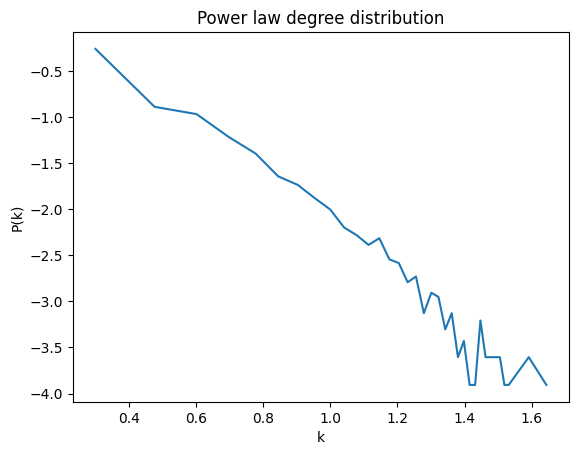

In [4]:
degree_distribution_sorted = dict(sorted(dd.items()))
print(degree_distribution_sorted)
degree_prob = dict()
keys = list(degree_distribution_sorted.keys())
total_nodes = sum(degree_distribution_sorted.values())
for i in range(len(degree_distribution_sorted)):
    degree_prob[keys[i]] = degree_distribution_sorted[keys[i]]/total_nodes
#logx = list(np.log10(list(degree_prob.keys())))
logx = (list(np.log10(list(degree_prob.keys()))))
logy = (list(np.log10(list(degree_prob.values()))))
print("Logx: ")
print(logx)
print("Logy: ")
print(logy)
plt.plot(logx[1:],logy[1:])
# plt.xscale('log')
# plt.yscale('log')
plt.title("Power law degree distribution")
plt.xlabel("k")
plt.ylabel("P(k)")

In [6]:
from sklearn.linear_model import LinearRegression

In [10]:
logxd = np.array(logx[1:])
logyd = np.array(logy[1:])
Logx = np.column_stack((np.ones(logxd.size).T,logxd))
Logy = np.column_stack((np.ones(logyd.size).T,logyd))
reg = LinearRegression().fit(Logx,Logy)
print("slope = " + str(reg.coef_))
print("c = " + str(reg.intercept_))

slope = [[ 0.          0.        ]
 [ 0.         -2.97184642]]
c = [1.         0.82518714]


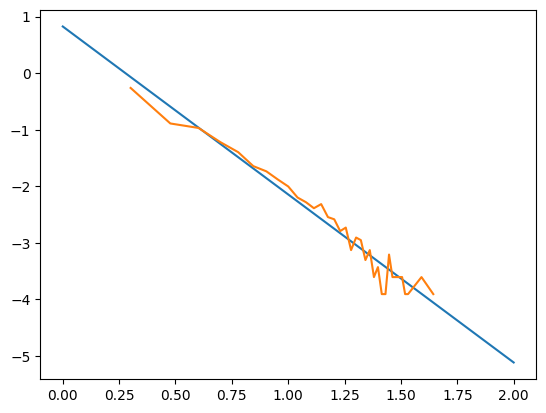

In [17]:
x_best_fit = np.linspace(0,2,100)
y_best_fit = 0.825 + x_best_fit*-2.97
plt.plot(x_best_fit,y_best_fit)
plt.plot(logx[1:],logy[1:])

In [20]:
print(np.log(np.log(len(G.nodes()))))

2.197838586277109


In [19]:
#FInding the APL of G1
apl = nx.average_shortest_path_length(G1)
print(apl)

11.028701293223026


In [23]:
#Finding the average clustering co-efficient
acc = nx.clustering(G1)
print("Found acc = " + str(np.mean(list(acc.values()))))

Found acc = 0.35394250685298034
